In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format

os.listdir('./data')

['2025 날씨 빅데이터 콘테스트.pdf',
 'data.csv',
 'data2.csv',
 'data2.zip',
 'train_subway21.csv',
 'train_subway22.csv',
 'train_subway23.csv',
 'typhoon',
 '서울교통공사_역사별 광고시설 현황 정보_20241128.csv',
 '자연재해',
 '폭염',
 '한파',
 '황사']

In [104]:
혼잡도 = pd.read_csv('./data/data2.csv', usecols=['날짜','연월일','년','월','혼잡도'])
혼잡도.head()

,날짜,연월일,년,월,혼잡도
0,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
1,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
2,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
3,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
4,2021-01-01 00:00:00,2021-01-01,2021,1,0.000


In [105]:
태풍 = pd.read_csv('./data/자연재해/태풍.csv')
폭염 = pd.read_csv('./data/자연재해/폭염.csv')
황사 = pd.read_csv('./data/자연재해/황사.csv')
한파 = pd.read_excel('./data/자연재해/한파.xlsx')

In [106]:
폭염.columns = ['날짜','폭염특보']
황사= 황사['일자	황사관측'.split()]
황사.columns = ['날짜','황사관측']
한파 = 한파[['일시','한파특보(O/X)']]
한파.columns = ['날짜','한파특보']

In [23]:
혼잡도

,날짜,연월일,년,월,혼잡도
0,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
1,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
2,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
3,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
4,2021-01-01 00:00:00,2021-01-01,2021,1,0.000
...,...,...,...,...,...
15653605,2023-12-31 23:00:00,2023-12-31,2023,12,18.000
15653606,2023-12-31 23:00:00,2023-12-31,2023,12,48.000
15653607,2023-12-31 23:00:00,2023-12-31,2023,12,11.000
15653608,2023-12-31 23:00:00,2023-12-31,2023,12,16.000


In [107]:
혼잡도['연월일'] = pd.to_datetime(혼잡도['연월일'])
태풍['날짜'] = pd.to_datetime(태풍['날짜'])
한파['날짜'] = pd.to_datetime(한파['날짜'])
황사['날짜'] = pd.to_datetime(황사['날짜'])

In [108]:
# 2) left_on / right_on 제대로 사용해서 병합
merged = 혼잡도.merge(
    태풍,
    how='left',
    left_on='연월일',
    right_on='날짜')
merged

,날짜_x,연월일,년,월,혼잡도,날짜_y,태풍여부
0,2021-01-01 00:00:00,2021-01-01,2021,1,0.000,NaT,NaN
1,2021-01-01 00:00:00,2021-01-01,2021,1,0.000,NaT,NaN
2,2021-01-01 00:00:00,2021-01-01,2021,1,0.000,NaT,NaN
3,2021-01-01 00:00:00,2021-01-01,2021,1,0.000,NaT,NaN
4,2021-01-01 00:00:00,2021-01-01,2021,1,0.000,NaT,NaN
...,...,...,...,...,...,...,...
17045737,2023-12-31 23:00:00,2023-12-31,2023,12,18.000,NaT,NaN
17045738,2023-12-31 23:00:00,2023-12-31,2023,12,48.000,NaT,NaN
17045739,2023-12-31 23:00:00,2023-12-31,2023,12,11.000,NaT,NaN
17045740,2023-12-31 23:00:00,2023-12-31,2023,12,16.000,NaT,NaN


In [ ]:
황사['황사관측'] = np.where(황사['황사관측']=='O', 1, 0)

한파['한파특보'] = np.where(한파['한파특보']=='X', 0, 1)

In [111]:
print(한파.head())
print(황사.head())
print(태풍.head())

          날짜  한파특보
0 2021-01-01     0
1 2021-01-01     0
2 2021-01-01     0
3 2021-01-01     0
4 2021-01-01     1
          날짜  황사관측
0 2021-01-12     0
1 2021-01-13     1
2 2021-01-14     1
3 2021-01-16     0
4 2021-03-16     1
          날짜  태풍여부
0 2021-02-18     1
1 2021-02-19     1
2 2021-02-20     1
3 2021-02-21     1
4 2021-02-22     1


In [112]:
print(한파.shape)
print(황사.shape)
print(태풍.shape)

(95840, 2)
(47, 2)
(1130, 2)


In [113]:
merged= 한파.merge(
    황사,
    how='left',
    on='날짜').merge(
    태풍,
    how='left',
    on='날짜')
merged.shape

(97067, 4)

In [114]:
merged= merged.fillna(0)

In [115]:
df = 혼잡도[['연월일','혼잡도']].drop_duplicates().reset_index(drop=True)
df = df.groupby('연월일')['혼잡도'].mean()
df.shape

(1080,)

In [116]:
# 2) left_on / right_on 제대로 사용해서 병합
merged2 = merged.merge(
    df,
    how='left',
    left_on='날짜',
    right_on='연월일')
# # 2) left_on / right_on 제대로 사용해서 병합
# merged2 = merged.merge(
#     황사,
#     how='left',
#     left_on='연월일',
#     right_on='날짜')
merged2.isna().sum()

날짜         0
한파특보       0
황사관측       0
태풍여부       0
혼잡도     2106
dtype: int64

In [117]:
merged2 = merged2.drop_duplicates()
merged2

,날짜,한파특보,황사관측,태풍여부,혼잡도
0,2021-01-01,0,0.000,0.000,14.600
4,2021-01-01,1,0.000,0.000,14.600
162,2021-01-02,0,0.000,0.000,23.500
166,2021-01-02,1,0.000,0.000,23.500
324,2021-01-03,0,0.000,0.000,18.054
...,...,...,...,...,...
96534,2023-12-29,1,0.000,0.000,66.458
96681,2023-12-30,0,0.000,0.000,48.443
96727,2023-12-30,1,0.000,0.000,48.443
96874,2023-12-31,0,0.000,0.000,55.106


In [118]:
merged2 = merged2.dropna()

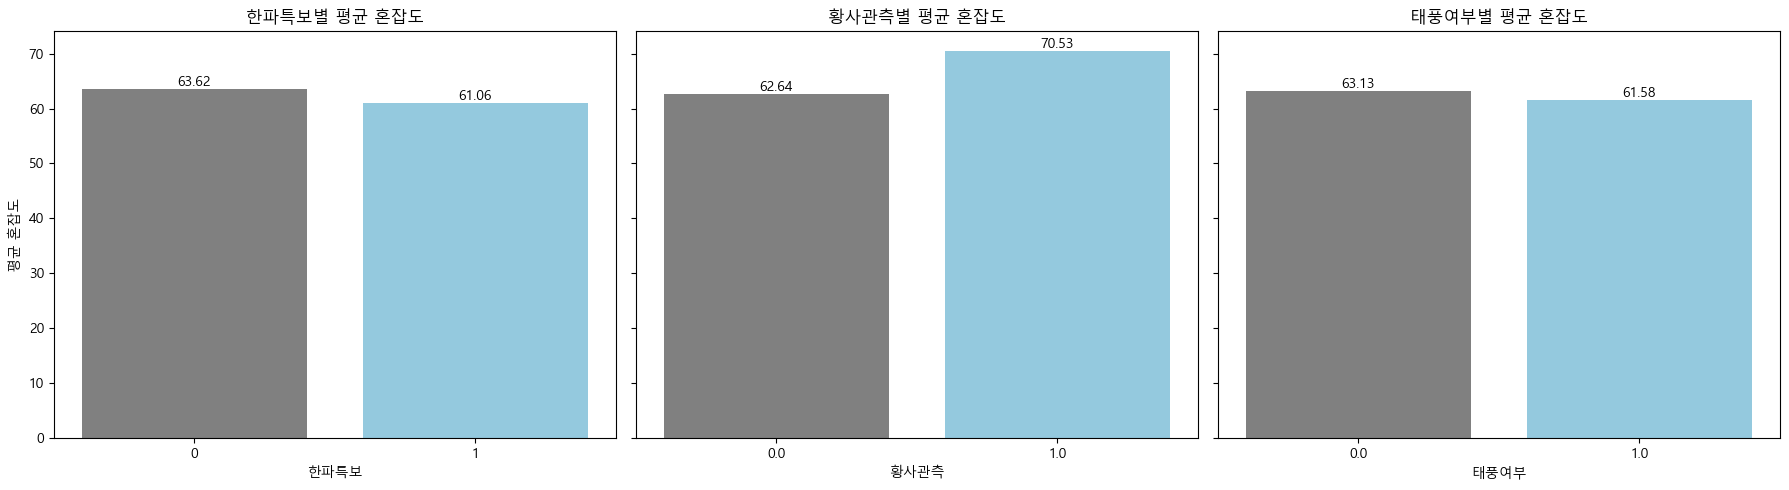

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 분석할 컬럼 목록
cols = ['한파특보', '황사관측', '태풍여부']

# 1행 3열 subplot 생성 (가로 18, 세로 5)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, col in zip(axes, cols):
    # 그룹별 평균 계산
    mean_df = merged2.groupby(col)['혼잡도'].mean().reset_index()
    
    # barplot
    sns.barplot(
        data=mean_df,
        x=col,
        y='혼잡도',
        palette=['grey','skyblue'],
        ci=None,
        ax=ax
    )
    ax.set_title(f'{col}별 평균 혼잡도')
    ax.set_xlabel(col)
    if ax is axes[0]:
        ax.set_ylabel('평균 혼잡도')
    else:
        ax.set_ylabel('')

    # 막대 위에 텍스트 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()

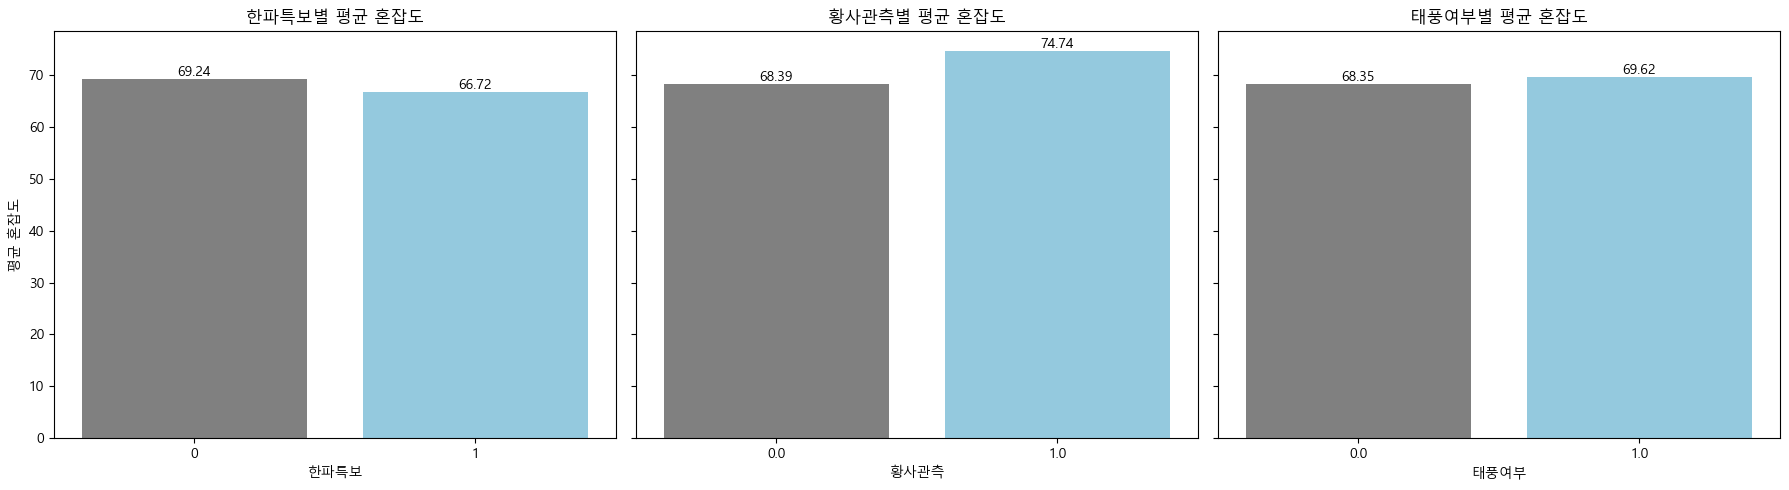

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 분석할 컬럼 목록
cols = ['한파특보', '황사관측', '태풍여부']

# 1행 3열 subplot 생성 (가로 18, 세로 5)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, col in zip(axes, cols):
    # 그룹별 평균 계산
    mean_df = merged2.groupby(col)['혼잡도'].median().reset_index()
    
    # barplot
    sns.barplot(
        data=mean_df,
        x=col,
        y='혼잡도',
        palette=['grey','skyblue'],
        ci=None,
        ax=ax
    )
    ax.set_title(f'{col}별 평균 혼잡도')
    ax.set_xlabel(col)
    if ax is axes[0]:
        ax.set_ylabel('평균 혼잡도')
    else:
        ax.set_ylabel('')

    # 막대 위에 텍스트 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

plt.tight_layout()
plt.show()

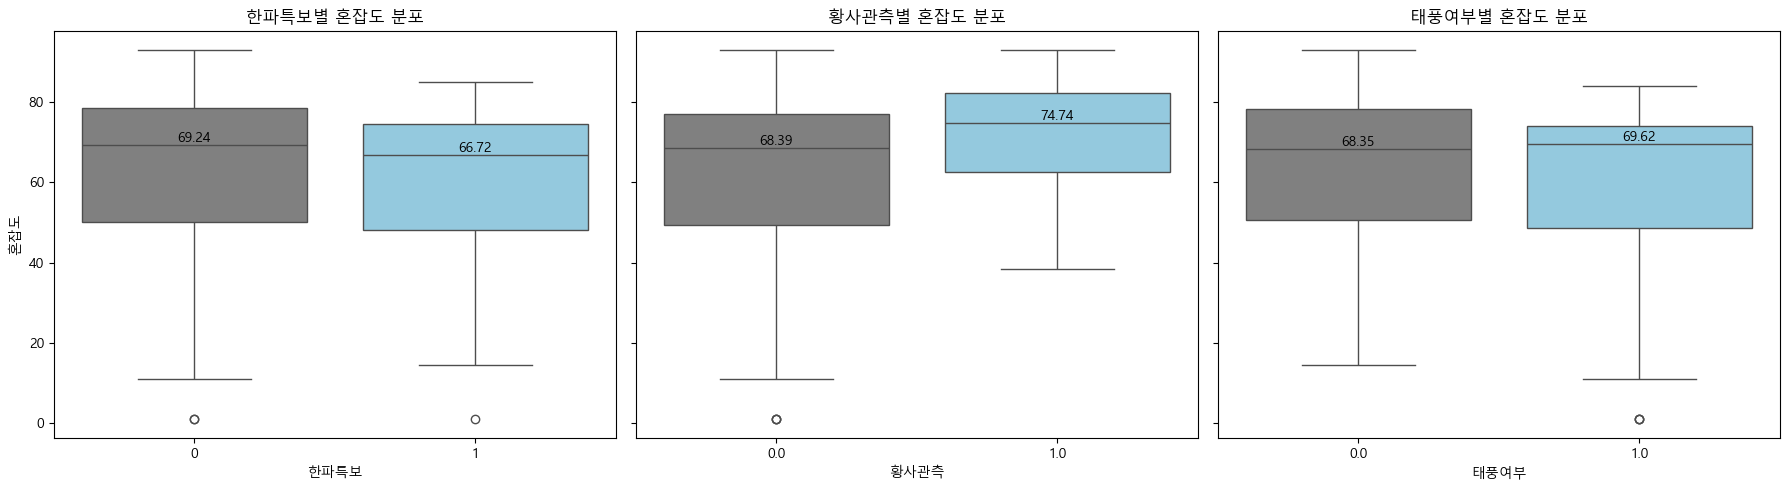

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 분석할 컬럼 목록
cols = ['한파특보', '황사관측', '태풍여부']

# 1행 3열 subplot 생성 (가로 18, 세로 5), y축 공유
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, col in zip(axes, cols):
    # 1) boxplot 그리기 (raw data)
    sns.boxplot(
        data=merged2,
        x=col,
        y='혼잡도',
        palette=['grey', 'skyblue'],
        ax=ax
    )
    ax.set_title(f'{col}별 혼잡도 분포')
    ax.set_xlabel(col)
    if ax is axes[0]:
        ax.set_ylabel('혼잡도')
    else:
        ax.set_ylabel('')

    # 2) 그룹별 중앙값 계산
    medians = merged2.groupby(col)['혼잡도'].median().values
    
    # 3) 중앙값 텍스트 표시
    for xtick, median in enumerate(medians):
        ax.text(
            xtick,                # x 위치: 카테고리 인덱스
            median,               # y 위치: 중앙값
            f'{median:.2f}',      # 표시할 텍스트
            ha='center',          
            va='bottom',          
            fontsize=10,
            color='black'
        )

plt.tight_layout()
plt.show()

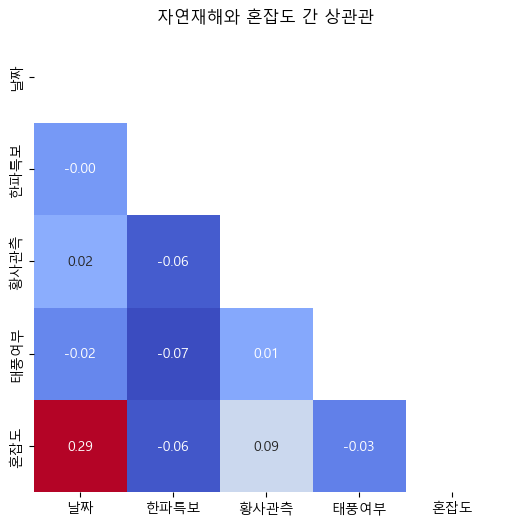

In [123]:
corr_tab = merged2.corr()
mask = np.triu(np.ones_like(corr_tab, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(corr_tab, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title("자연재해와 혼잡도 간 상관관")
plt.show()